In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.ticker import MaxNLocator
sns.set_style('darkgrid')

In [2]:
with zipfile.ZipFile('NationalNames.zip') as zip_ref:
    # List the contents of the zip file (to see the file inside)
    zip_file_list = zip_ref.namelist()
    print(zip_file_list) 
    
    with zip_ref.open(zip_file_list[0]) as file:
        NationalNames_df = pd.read_csv(file)

['NationalNames.csv', 'NationalReadMe.pdf']


In [3]:
NationalNames_df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [4]:
NationalNames_df.isna().sum()

Id        0
Name      0
Year      0
Gender    0
Count     0
dtype: int64

In [5]:
# StateNames_df = pd.read_csv(f'StateNames.csv', index_col='Id')
# StateNames_df.isna().sum()

There are no missing values in the DataSets, which indicates they are complete in terms of data. This is aligned with the assessment of the source!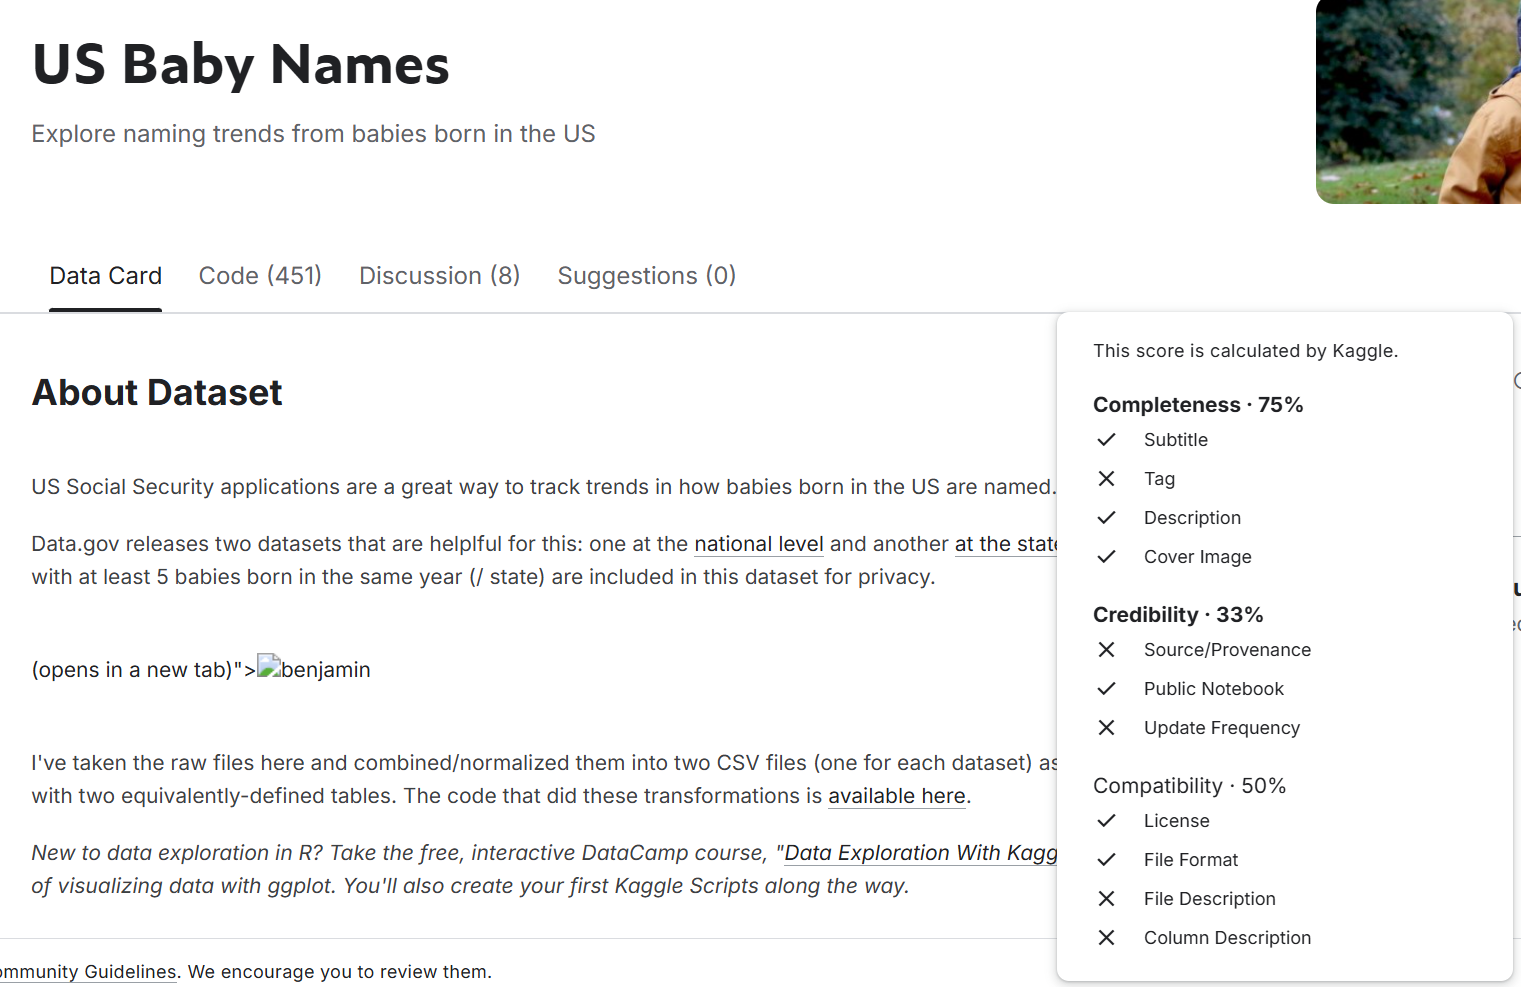

Adding a Column for Decades to facilitate broad visualization of the Data. There is data from the year 1880 until 2015, meaning that visualizing data per year is not practical. 

In [6]:
NationalNames_df['Decade'] = (NationalNames_df['Year'] // 10) * 10 

In [7]:
NationalNamesF_df = NationalNames_df[NationalNames_df['Gender'] == 'F'].reset_index(drop=True)
NationalNamesM_df = NationalNames_df[NationalNames_df['Gender'] == 'M'].reset_index(drop=True)
display(NationalNamesF_df, NationalNamesM_df)

,Id,Name,Year,Gender,Count,Decade
0,1,Mary,1880,F,7065,1880
1,2,Anna,1880,F,2604,1880
2,3,Emma,1880,F,2003,1880
3,4,Elizabeth,1880,F,1939,1880
4,5,Minnie,1880,F,1746,1880
...,...,...,...,...,...,...
1081678,1811452,Zyiona,2014,F,5,2010
1081679,1811453,Zykeriah,2014,F,5,2010
1081680,1811454,Zylynn,2014,F,5,2010
1081681,1811455,Zyrihanna,2014,F,5,2010


,Id,Name,Year,Gender,Count,Decade
0,943,John,1880,M,9655,1880
1,944,William,1880,M,9532,1880
2,945,James,1880,M,5927,1880
3,946,Charles,1880,M,5348,1880
4,947,George,1880,M,5126,1880
...,...,...,...,...,...,...
743745,1825429,Zykeem,2014,M,5,2010
743746,1825430,Zymeer,2014,M,5,2010
743747,1825431,Zymiere,2014,M,5,2010
743748,1825432,Zyran,2014,M,5,2010


In [8]:
print(f'Registered Names with at least 5 occurrences: {NationalNames_df["Count"].sum()} \n'
      f'Registered People with Female names with at least 5 occurrences: {NationalNamesF_df["Count"].sum()} \n'
      f'Registered People with Male names with at least 5 occurrences: {NationalNamesM_df["Count"].sum()} \n')

Registered Names with at least 5 occurrences: 337135426 
Registered People with Female names with at least 5 occurrences: 167070477 
Registered People with Male names with at least 5 occurrences: 170064949 



# Let's find out which names were used the most overall:

In [9]:
topNamesOverall = NationalNames_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

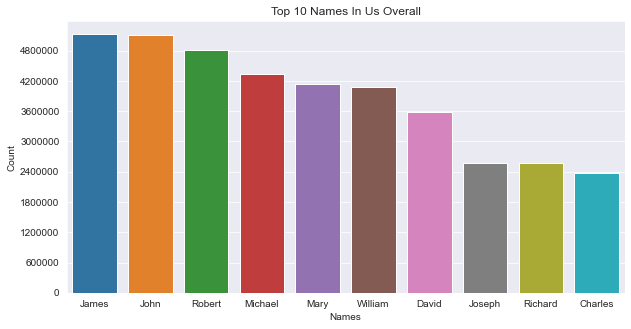

In [10]:
plt.pyplot.figure(figsize=(10, 5))

topNamesOverall_plt = sns.barplot(data= topNamesOverall.head(10), x='Name' , y='Count')
topNamesOverall_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topNamesOverall_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.pyplot.title('Top 10 Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

Amongst the top 10 names, 9 are male! It seems useful to split the Dataset between female and male names:

In [11]:
topFemaleNamesOverall = NationalNamesF_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

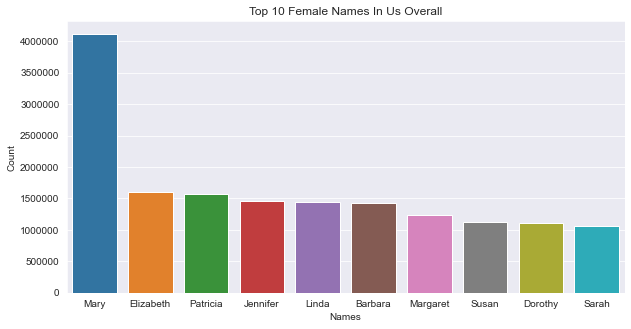

In [12]:
plt.pyplot.figure(figsize=(10, 5))

topFemaleNamesOverall_plt = sns.barplot(data= topFemaleNamesOverall.head(10), x='Name' , y='Count')
topFemaleNamesOverall_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topFemaleNamesOverall_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 10 Female Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

The name Mary is extremely more common than any other Female name! This prompts us to look at its use spread across time!

In [13]:
topMaleNamesOverall = NationalNamesM_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

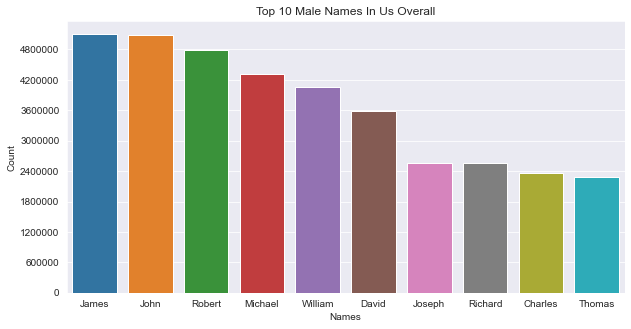

In [14]:
plt.pyplot.figure(figsize=(10, 5))

topMaleNamesOverall_plt = sns.barplot(data= topMaleNamesOverall.head(10), x='Name' , y='Count')
topMaleNamesOverall_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topMaleNamesOverall_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Top 10 Male Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

Male names have their counts much more similar and we can see a gradual dropoff as opposed to a clear leader in occurences and then a very gentle dropoff. 

In [15]:
print(f'Unique Names: {NationalNames_df["Name"].nunique()} \n'
        f'Count of Unisex Names: {topFemaleNamesOverall["Name"].isin(topMaleNamesOverall["Name"]).sum()} \n'
        f'Unique Female Names: {len(topFemaleNamesOverall)} \n'
        f'Unique Male Names: {len(topMaleNamesOverall)} \n')

Unique Names: 93889 
Count of Unisex Names: 10221 
Unique Female Names: 64911 
Unique Male Names: 39199 



In [16]:
topUnisexNamesOverall = NationalNames_df.groupby('Name')['Gender'].nunique()
topUnisexNamesOverall = topUnisexNamesOverall[topUnisexNamesOverall > 1].index
topUnisexNamesOverall = NationalNames_df[NationalNames_df['Name'].isin(topUnisexNamesOverall)].groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

In [17]:
topUnisexNamesOverall

,Name,Count
4230,James,5129096
4676,John,5106590
8096,Robert,4816785
6831,Michael,4330805
6619,Mary,4130441
...,...,...
1137,Bonell,10
1500,Camlin,10
9936,Wilmeth,10
6320,Macaire,10


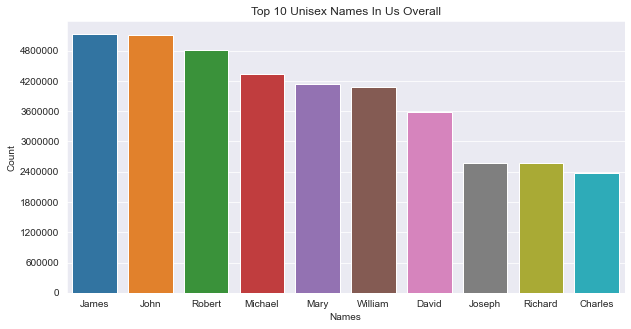

In [18]:
plt.pyplot.figure(figsize=(10, 5))

topUnisexNamesOverall_plt = sns.barplot(data= topUnisexNamesOverall.head(10), x='Name' , y='Count')
topUnisexNamesOverall_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topUnisexNamesOverall_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Top 10 Unisex Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

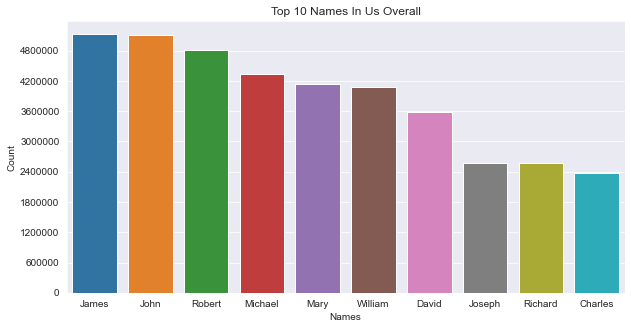
As can be observed, the top "Unisex" names and the top names are a match. Although these might actually be the most unisex names, by consequense of being the most common names they're also the names most likelly to have been incorectly inputed in registry systems.

# Knowing that the names in the dataset are approximately 50% Female, 50% Male, leads us to 2 hypostasis: 
## Female names have more variety than Male names
## Common Male Names have significantly more registers than Female names

Female Names Satistics:
           Count
count   64911.00
mean     2573.84
std     34391.09
min         5.00
25%        10.00
50%        43.00
75%       220.00
max   4115282.00


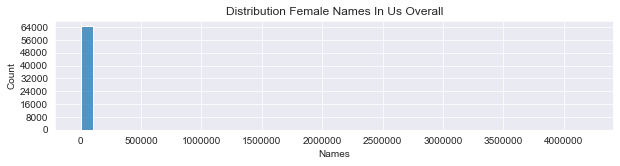

Male Names Satistics:
           Count
count   39199.00
mean     4338.50
std     73254.92
min         5.00
25%        11.00
50%        45.00
75%       246.00
max   5105919.00


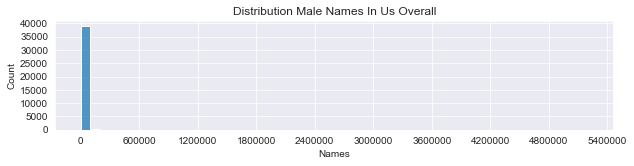

In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(f'Female Names Satistics:\n{topFemaleNamesOverall.describe()}')

plt.pyplot.figure(figsize=(10, 2))

femaleNameDist_hstplot = sns.histplot(topFemaleNamesOverall["Count"], binwidth=100000)
femaleNameDist_hstplot.xaxis.set_major_locator(MaxNLocator(integer=True))
femaleNameDist_hstplot.yaxis.set_major_locator(MaxNLocator(integer=True))
femaleNameDist_hstplot.xaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Distribution Female Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

print(f'Male Names Satistics:\n{topMaleNamesOverall.describe()}')

plt.pyplot.figure(figsize=(10, 2))

maleNameDist_hstplot = sns.histplot(topMaleNamesOverall["Count"], binwidth=100000)
maleNameDist_hstplot.xaxis.set_major_locator(MaxNLocator(integer=True))
maleNameDist_hstplot.yaxis.set_major_locator(MaxNLocator(integer=True))
maleNameDist_hstplot.xaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Distribution Male Names In Us Overall')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

 We have confirmed that Female names have significantly more variety than male names in the US

In both female and male names registered, the vast majority have between 0 and 100000 registers! 
As hypothesised, the more common male names have more occurrences, shown by  the mean and median count of male names being higher, significantly so when it comes to the mean (2573.84 vs 4338.50)

# Now that there is a general understanding of the data available, let's focuss on more recent trends
## In the Last 50 Years:

In [20]:
lastFiveDecadesNationalNames_df = NationalNames_df[NationalNames_df['Year'] >= (NationalNames_df['Year'].max() - 50)]
lastFiveDecadesNationalNamesF_df = NationalNamesF_df[NationalNamesF_df['Year'] >= (NationalNamesF_df['Year'].max() - 50)]
lastFiveDecadesNationalNamesM_df = NationalNamesM_df[NationalNamesM_df['Year'] >= (NationalNamesM_df['Year'].max() - 50)]

display(lastFiveDecadesNationalNames_df, lastFiveDecadesNationalNamesF_df, lastFiveDecadesNationalNamesM_df)

,Id,Name,Year,Gender,Count,Decade
621025,621026,Lisa,1964,F,54275,1960
621026,621027,Mary,1964,F,40986,1960
621027,621028,Susan,1964,F,31516,1960
621028,621029,Karen,1964,F,30246,1960
621029,621030,Patricia,1964,F,26084,1960
...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,2010
1825429,1825430,Zymeer,2014,M,5,2010
1825430,1825431,Zymiere,2014,M,5,2010
1825431,1825432,Zyran,2014,M,5,2010


,Id,Name,Year,Gender,Count,Decade
353641,621026,Lisa,1964,F,54275,1960
353642,621027,Mary,1964,F,40986,1960
353643,621028,Susan,1964,F,31516,1960
353644,621029,Karen,1964,F,30246,1960
353645,621030,Patricia,1964,F,26084,1960
...,...,...,...,...,...,...
1081678,1811452,Zyiona,2014,F,5,2010
1081679,1811453,Zykeriah,2014,F,5,2010
1081680,1811454,Zylynn,2014,F,5,2010
1081681,1811455,Zyrihanna,2014,F,5,2010


,Id,Name,Year,Gender,Count,Decade
267384,628828,Michael,1964,M,82674,1960
267385,628829,John,1964,M,82536,1960
267386,628830,David,1964,M,75066,1960
267387,628831,James,1964,M,73050,1960
267388,628832,Robert,1964,M,69994,1960
...,...,...,...,...,...,...
743745,1825429,Zykeem,2014,M,5,2010
743746,1825430,Zymeer,2014,M,5,2010
743747,1825431,Zymiere,2014,M,5,2010
743748,1825432,Zyran,2014,M,5,2010


In [21]:
print(f'Registered People with at least 5 occurrences in the last 50 years: {lastFiveDecadesNationalNames_df["Count"].sum()} \n'
      f'Registered People with Female names with at least 5 occurrences in the last 50 years: {lastFiveDecadesNationalNamesF_df["Count"].sum()} \n'
      f'Registered People with Male names with at least 5 occurrences in the last 50 years: {lastFiveDecadesNationalNamesM_df["Count"].sum()} \n')

Registered People with at least 5 occurrences in the last 50 years: 182961045 
Registered People with Female names with at least 5 occurrences in the last 50 years: 88192254 
Registered People with Male names with at least 5 occurrences in the last 50 years: 94768791 



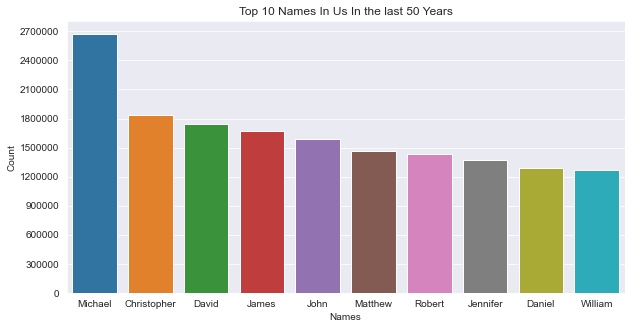

In [22]:
topNamesLastFiveDecades = lastFiveDecadesNationalNames_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

plt.pyplot.figure(figsize=(10, 5))

topNamesLastFiveDecades_plt = sns.barplot(data= topNamesLastFiveDecades.head(10), x='Name' , y='Count')
topNamesLastFiveDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topNamesLastFiveDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Top 10 Names In Us In the last 50 Years')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

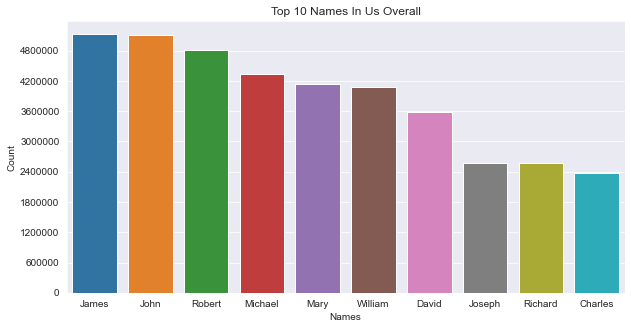
In comparison with the overall data, we can see that in the last 50 years, 6 of the top 10 remain the same (Michael, David, James, John, Robert and William) but none, in the same rank. This indicates that, at least for male names, the more common names are consistent.

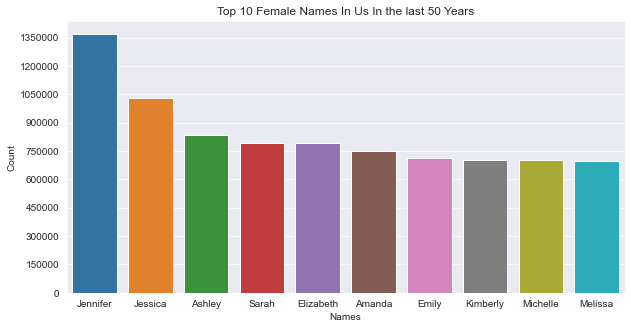

In [23]:
topFemaleNameslastFiveDecades = lastFiveDecadesNationalNamesF_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

plt.pyplot.figure(figsize=(10, 5))

topFemaleNameslastFiveDecades_plt = sns.barplot(data= topFemaleNameslastFiveDecades.head(10), x='Name' , y='Count')
topFemaleNameslastFiveDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topFemaleNameslastFiveDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Top 10 Female Names In Us In the last 50 Years')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

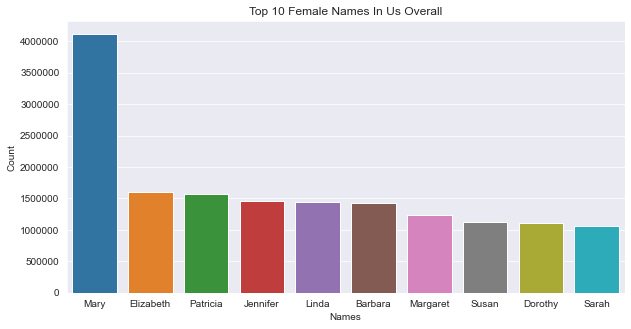
In comparison with the overall female data, we can see that in the last 50 years, only 3 of the top 10 remain the same (Jennifer, Sarah and Elizabeth). This indicates that, for female names, the more common names are significantly more trendy than male names. This is also supported by the absence of the overwhelmingly dominant name in the overall data, Mary, in the top 10 of the more recent five decades of data.

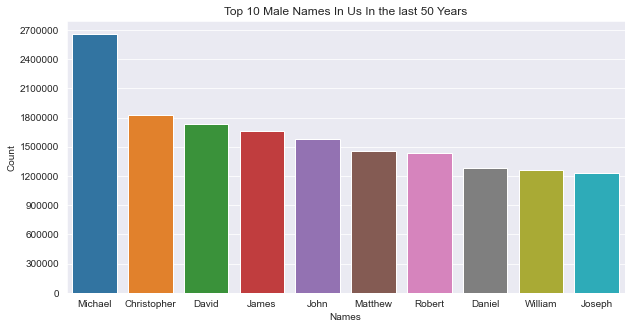

In [24]:
topMaleNameslastFiveDecades = lastFiveDecadesNationalNamesM_df.groupby('Name')['Count'].sum().reset_index().sort_values(['Count'], ascending=[False])

plt.pyplot.figure(figsize=(10, 5))

topMaleNameslastFiveDecades_plt = sns.barplot(data= topMaleNameslastFiveDecades.head(10), x='Name' , y='Count')
topMaleNameslastFiveDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topMaleNameslastFiveDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Top 10 Male Names In Us In the last 50 Years')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

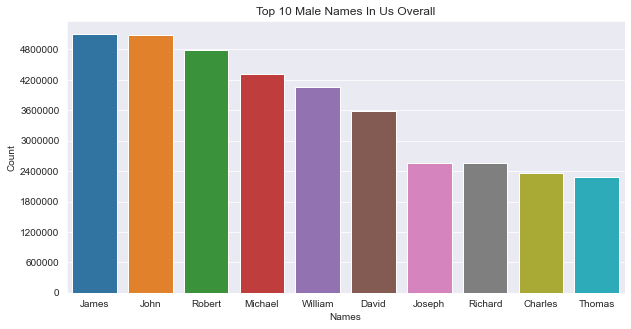
In comparison with the overall Male data, we can see that in the last 50 years, 7 of the top 10 remain the same (Michael, David, James, John, Robert, William and Joseph) but none, in the same rank. As mentioned before, this indicates that for male names, the more common names are quite consistent.

Female Names Satistics:
           Count
count   58230.00
mean     1514.55
std     18009.20
min         5.00
25%        10.00
50%        41.00
75%       195.00
max   1369257.00


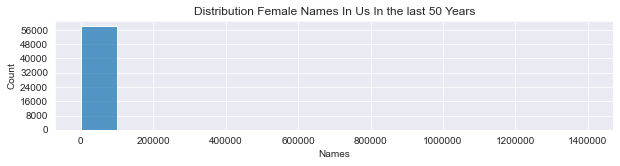

Male Names Satistics:
           Count
count   35166.00
mean     2694.90
std     38020.00
min         5.00
25%        11.00
50%        43.00
75%       216.75
max   2658220.00


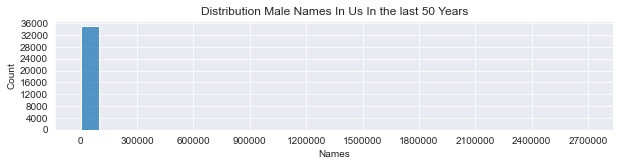

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(f'Female Names Satistics:\n{topFemaleNameslastFiveDecades.describe()}')

plt.pyplot.figure(figsize=(10, 2))

femaleNameDist_hstplot = sns.histplot(topFemaleNameslastFiveDecades["Count"], binwidth=100000)
femaleNameDist_hstplot.xaxis.set_major_locator(MaxNLocator(integer=True))
femaleNameDist_hstplot.yaxis.set_major_locator(MaxNLocator(integer=True))
femaleNameDist_hstplot.xaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Distribution Female Names In Us In the last 50 Years')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

print(f'Male Names Satistics:\n{topMaleNameslastFiveDecades.describe()}')

plt.pyplot.figure(figsize=(10, 2))

maleNameDist_hstplot = sns.histplot(topMaleNameslastFiveDecades["Count"], binwidth=100000)
maleNameDist_hstplot.xaxis.set_major_locator(MaxNLocator(integer=True))
maleNameDist_hstplot.yaxis.set_major_locator(MaxNLocator(integer=True))
maleNameDist_hstplot.xaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.pyplot.title('Distribution Male Names In Us In the last 50 Years')
plt.pyplot.xlabel('Names')
plt.pyplot.ylabel('Count')
plt.pyplot.show()

Looking at the distributions for the last 50 years, we can see that the observations made previously on the overall data remain accurate, although the absence of the acute reduction of registered Maries has made the statistics on both groups closer together

## In the past 20 Years By Decade:

In [26]:
lastTwoDecadesNationalNames_df = NationalNames_df[NationalNames_df['Year'] >= (NationalNames_df['Year'].max() - 20)]
lastTwoDecadesNationalNamesF_df = NationalNamesF_df[NationalNamesF_df['Year'] >= (NationalNamesF_df['Year'].max() - 20)]
lastTwoDecadesNationalNamesM_df = NationalNamesM_df[NationalNamesM_df['Year'] >= (NationalNamesM_df['Year'].max() - 20)]

display(lastTwoDecadesNationalNames_df, lastTwoDecadesNationalNamesF_df, lastTwoDecadesNationalNamesM_df)

,Id,Name,Year,Gender,Count,Decade
1170642,1170643,Jessica,1994,F,32116,1990
1170643,1170644,Ashley,1994,F,30277,1990
1170644,1170645,Emily,1994,F,24148,1990
1170645,1170646,Samantha,1994,F,22819,1990
1170646,1170647,Sarah,1994,F,22275,1990
...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,2010
1825429,1825430,Zymeer,2014,M,5,2010
1825430,1825431,Zymiere,2014,M,5,2010
1825431,1825432,Zyran,2014,M,5,2010


,Id,Name,Year,Gender,Count,Decade
696224,1170643,Jessica,1994,F,32116,1990
696225,1170644,Ashley,1994,F,30277,1990
696226,1170645,Emily,1994,F,24148,1990
696227,1170646,Samantha,1994,F,22819,1990
696228,1170647,Sarah,1994,F,22275,1990
...,...,...,...,...,...,...
1081678,1811452,Zyiona,2014,F,5,2010
1081679,1811453,Zykeriah,2014,F,5,2010
1081680,1811454,Zylynn,2014,F,5,2010
1081681,1811455,Zyrihanna,2014,F,5,2010


,Id,Name,Year,Gender,Count,Decade
474418,1186396,Michael,1994,M,44465,1990
474419,1186397,Christopher,1994,M,34799,1990
474420,1186398,Matthew,1994,M,33645,1990
474421,1186399,Joshua,1994,M,31367,1990
474422,1186400,Tyler,1994,M,30477,1990
...,...,...,...,...,...,...
743745,1825429,Zykeem,2014,M,5,2010
743746,1825430,Zymeer,2014,M,5,2010
743747,1825431,Zymiere,2014,M,5,2010
743748,1825432,Zyran,2014,M,5,2010


In [27]:
print(f'Registered Names with at least 5 occurrences in the last 20 years: {lastTwoDecadesNationalNames_df["Count"].sum()} \n'
      f'Registered People with Female names with at least 5 occurrences in the last 20 years: {lastTwoDecadesNationalNamesF_df["Count"].sum()} \n'
      f'Registered People with Male names with at least 5 occurrences in the last 20 years: {lastTwoDecadesNationalNamesM_df["Count"].sum()} \n')

Registered Names with at least 5 occurrences in the last 20 years: 78674177 
Registered People with Female names with at least 5 occurrences in the last 20 years: 37819646 
Registered People with Male names with at least 5 occurrences in the last 20 years: 40854531 



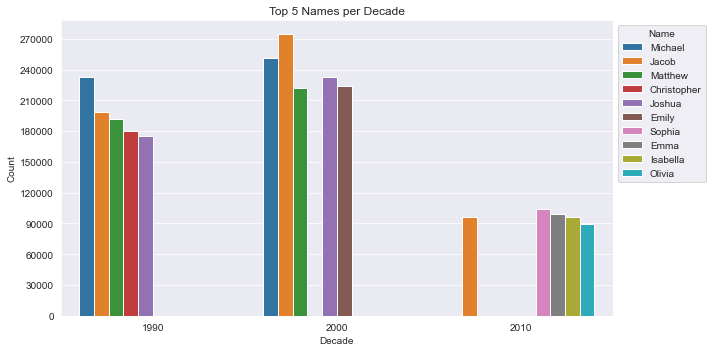

In [28]:
topNamesLastTwoDecades = lastTwoDecadesNationalNames_df.groupby(['Decade', 'Name'], as_index=False)['Count'].sum().sort_values(['Decade', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topNamesLastTwoDecades_plt = sns.barplot(data=topNamesLastTwoDecades.groupby('Decade').head(5), x='Decade' , y='Count', hue='Name')
topNamesLastTwoDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topNamesLastTwoDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Names per Decade')
plt.pyplot.xlabel('Decade')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

Looking at the top 5 names in the last 20 years of data per decade shows us an interesting trend: In the 2010s the variety of Female names decreased drastically while the variety of Male may have increased, being the only period of Data analysed where the top names are mostly female. This can be seen in opposition to the previous 15 years(dataset has data up to 2015, hence 3 "different" decades for only 20 years) where the top 5 registered names are mostly male. This can be affirmed as proportion of male-registered and female-registered names in the period remains close to 50/50.

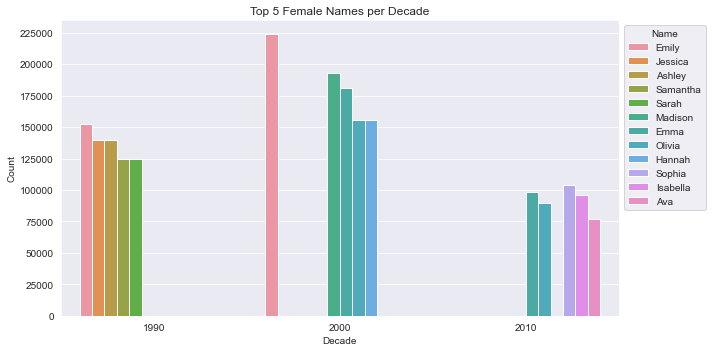

In [29]:
topFemaleNameslastTwoDecades = lastTwoDecadesNationalNamesF_df.groupby(['Decade', 'Name'], as_index=False)['Count'].sum().sort_values(['Decade', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topFemaleNameslastTwoDecades_plt = sns.barplot(data=topFemaleNameslastTwoDecades.groupby('Decade').head(5), x='Decade' , y='Count', hue='Name')
topFemaleNameslastTwoDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topFemaleNameslastTwoDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Female Names per Decade')
plt.pyplot.xlabel('Decade')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

While the variety of common names has increased, the trendiness of female names seems to remain, being that this is the only group that includes 11 distinct names out of 15 possibilities and it can be observed that in the late 90's the 5 most common names are completely different from the 2010s. This is less true when looking at the data from 2000 on, where the overlap is more significant.

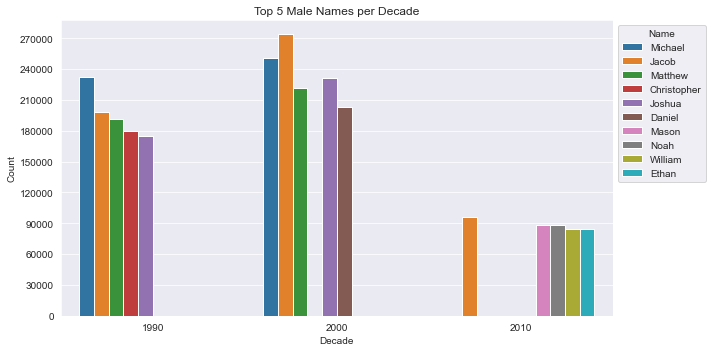

In [30]:
topMaleNameslastTwoDecades = lastTwoDecadesNationalNamesM_df.groupby(['Decade', 'Name'], as_index=False)['Count'].sum().sort_values(['Decade', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topMaleNameslastTwoDecades_plt = sns.barplot(data=topMaleNameslastTwoDecades.groupby('Decade').head(5), x='Decade' , y='Count', hue='Name')
topMaleNameslastTwoDecades_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topMaleNameslastTwoDecades_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Male Names per Decade')
plt.pyplot.xlabel('Decade')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

As postulated earlier, the pattern of the most common male names remaining the most common over time appears to be shifting to a more trendy name choice. The fact that we can only see this when looking at the most recent data available, as opposed to the female case (where names appear to go in and out of "fashion" completely in a relatively short timeframe), might indicate that this is a temporary shift, but more recent data would be necessary to confirm this hypothesis.

## In the past 5 Years By Year:

In [31]:
lastFiveYearsNationalNames_df = NationalNames_df[NationalNames_df['Year'] >= (NationalNames_df['Year'].max() - 5)]
lastFiveYearsNationalNamesF_df = NationalNamesF_df[NationalNamesF_df['Year'] >= (NationalNamesF_df['Year'].max() - 5)]
lastFiveYearsNationalNamesM_df = NationalNamesM_df[NationalNamesM_df['Year'] >= (NationalNamesM_df['Year'].max() - 5)]

display(lastFiveYearsNationalNames_df, lastFiveYearsNationalNamesF_df, lastFiveYearsNationalNamesM_df)

,Id,Name,Year,Gender,Count,Decade
1622908,1622909,Isabella,2009,F,22278,2000
1622909,1622910,Emma,2009,F,17881,2000
1622910,1622911,Olivia,2009,F,17420,2000
1622911,1622912,Sophia,2009,F,16925,2000
1622912,1622913,Ava,2009,F,15861,2000
...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,2010
1825429,1825430,Zymeer,2014,M,5,2010
1825430,1825431,Zymiere,2014,M,5,2010
1825431,1825432,Zyran,2014,M,5,2010


,Id,Name,Year,Gender,Count,Decade
964452,1622909,Isabella,2009,F,22278,2000
964453,1622910,Emma,2009,F,17881,2000
964454,1622911,Olivia,2009,F,17420,2000
964455,1622912,Sophia,2009,F,16925,2000
964456,1622913,Ava,2009,F,15861,2000
...,...,...,...,...,...,...
1081678,1811452,Zyiona,2014,F,5,2010
1081679,1811453,Zykeriah,2014,F,5,2010
1081680,1811454,Zylynn,2014,F,5,2010
1081681,1811455,Zyrihanna,2014,F,5,2010


,Id,Name,Year,Gender,Count,Decade
658456,1643074,Jacob,2009,M,21144,2000
658457,1643075,Ethan,2009,M,19834,2000
658458,1643076,Michael,2009,M,18909,2000
658459,1643077,Alexander,2009,M,18215,2000
658460,1643078,William,2009,M,17899,2000
...,...,...,...,...,...,...
743745,1825429,Zykeem,2014,M,5,2010
743746,1825430,Zymeer,2014,M,5,2010
743747,1825431,Zymiere,2014,M,5,2010
743748,1825432,Zyran,2014,M,5,2010


In [32]:
print(f'Registered Names with at least 5 occurrences in the last 5 years: {lastFiveYearsNationalNames_df["Count"].sum()} \n'
      f'Registered People with Female names with at least 5 occurrences in the last 5 years: {lastFiveYearsNationalNamesF_df["Count"].sum()} \n'
      f'Registered People with Male names with at least 5 occurrences in the last 5 years: {lastFiveYearsNationalNamesM_df["Count"].sum()} \n')

Registered Names with at least 5 occurrences in the last 5 years: 22085836 
Registered People with Female names with at least 5 occurrences in the last 5 years: 10627199 
Registered People with Male names with at least 5 occurrences in the last 5 years: 11458637 



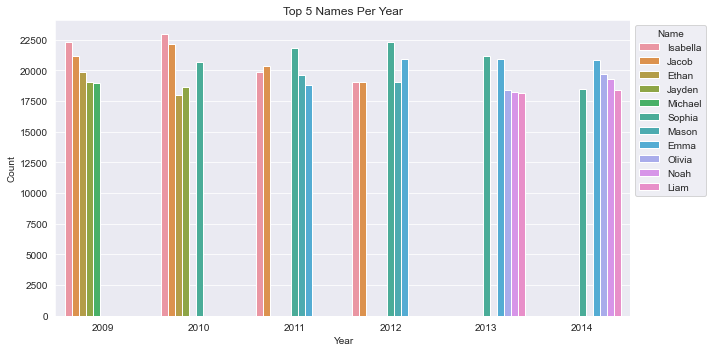

In [33]:
topNamesLastFiveYears = lastFiveYearsNationalNames_df.groupby(['Year', 'Name'], as_index=False)['Count'].sum().sort_values(['Year', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topNamesLastFiveYears_plt = sns.barplot(data=topNamesLastFiveYears.groupby('Year').head(5), x='Year' , y='Count', hue='Name')
topNamesLastFiveYears_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topNamesLastFiveYears_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Names Per Year')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

As seen in the previous section, the last 5 years of data show a reversal in the overall, last 50 and possibly last 20 years most common names, where the top ranks were usually occupied by male names and the most common female names exhibited high variance (only 3 names make the top ten both overall and in the last 50 years, as opposed to 7 male names. We also see a sharp decline in absolute occurrences of the most common names in the last 5 years when compared to an equal window of time in the second half of the 90s decade.

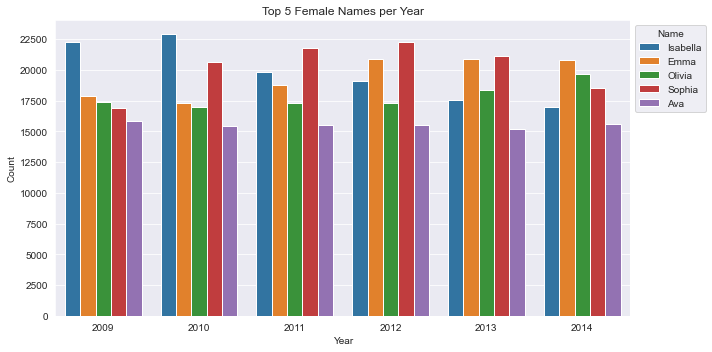

In [34]:
topFemaleNameslastFiveYears = lastFiveYearsNationalNamesF_df.groupby(['Year', 'Name'], as_index=False)['Count'].sum().sort_values(['Year', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topFemaleNameslastFiveYears_plt = sns.barplot(data=topFemaleNameslastFiveYears.groupby('Year').head(5), x='Year' , y='Count', hue='Name')
topFemaleNameslastFiveYears_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topFemaleNameslastFiveYears_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Female Names per Year')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

Looking closer at the data from the last 5 years, we see a more exaggerated reversal of the trend, having the 5 most common female names remain the same for all years.

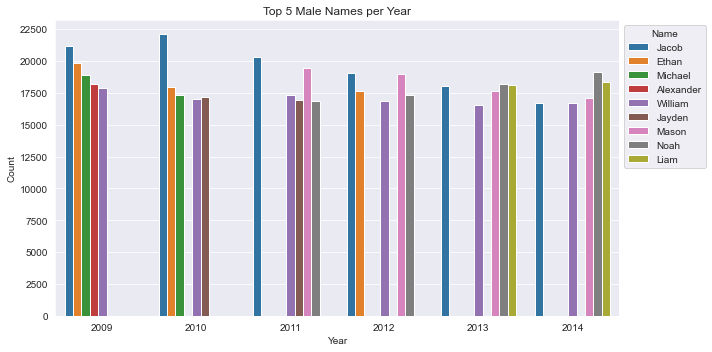

In [35]:
topMaleNameslastFiveYears = lastFiveYearsNationalNamesM_df.groupby(['Year', 'Name'], as_index=False)['Count'].sum().sort_values(['Year', 'Count'], ascending=[True, False])

plt.pyplot.figure(figsize=(10, 5))

topMaleNameslastFiveYears_plt = sns.barplot(data=topMaleNameslastFiveYears.groupby('Year').head(5), x='Year' , y='Count', hue='Name')
topMaleNameslastFiveYears_plt.yaxis.set_major_locator(MaxNLocator(integer=True))
topMaleNameslastFiveYears_plt.yaxis.set_major_formatter(plt.pyplot.FuncFormatter(lambda x, _: f'{int(x)}'))


plt.pyplot.title('Top 5 Male Names per Year')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(title='Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.pyplot.tight_layout()
plt.pyplot.show()

Again, when looking at male names in the first half of the 2010s we're presented with 9 different names in the top 5 most common names for each year, a reversal of the overall and past 50 years trend (where the most common male names showed low variance).